# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns

# Data Collection

In [2]:
# Load data
data = pd.read_csv('creditcard.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### There are no Null values, hence good to proceed

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Feature Scaling

In [6]:
# Feature scaling
scaler = StandardScaler()

# Scaling 'Time' and 'Amount'
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])
print("The Data after scaling\n")
data

The Data after scaling



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


# Visualization

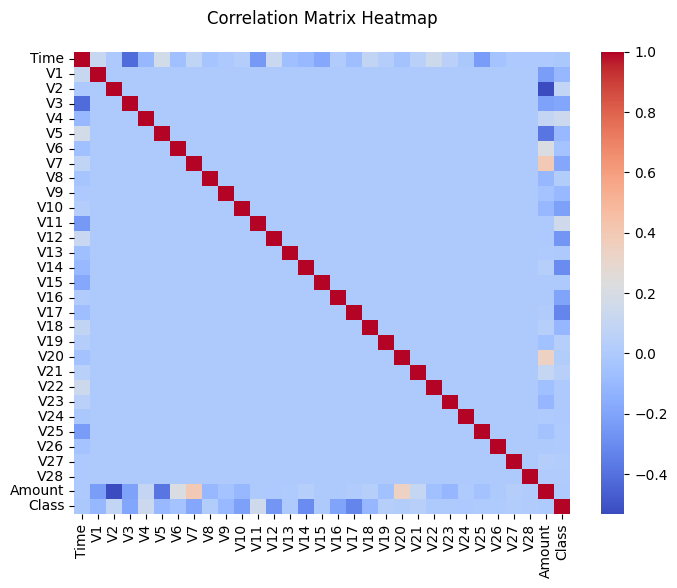

In [7]:
numeric = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric.corr()

# Plot the heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap', pad = 20)
plt.show()

Class
0    284315
1       492
Name: count, dtype: int64


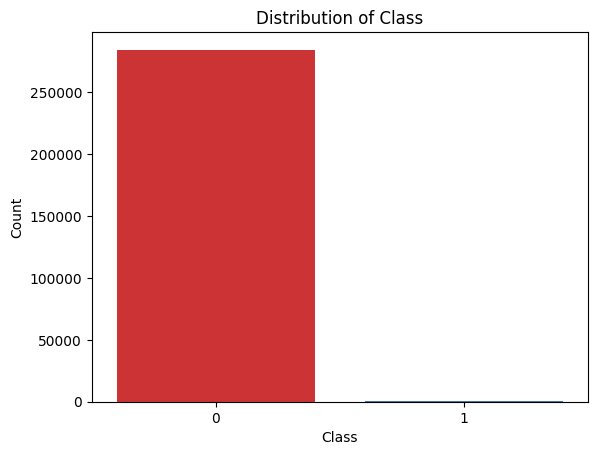

In [8]:
print(data["Class"].value_counts())

sns.countplot(x='Class', data=data, hue='Class', palette='Set1', legend=False)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class')
plt.show()


### Thus, makes it clear that there is class imbalance

# Addressing Class imbalance using RandomOverSampler

Class count before oversampling
Class
0    284315
1       492
Name: count, dtype: int64

Class count after oversampling
Class
0    284315
1    284315
Name: count, dtype: int64

Training set shape: (454904, 30)
Testing set shape: (113726, 30)


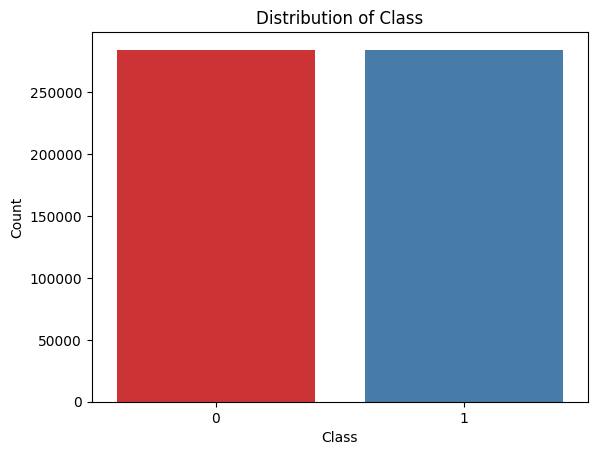

In [9]:
# Split the dataset into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']
print("Class count before oversampling")
print(y.value_counts())

# Handling class imbalance
# Using Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("\nClass count after oversampling")
print(y_resampled.value_counts())

# Split the resampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Display the shapes of the training and testing sets
print()
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

#sns.countplot(x=y_resampled, color='brown')
sns.countplot(x=y_resampled, hue=y_resampled, palette='Set1', legend=False)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class')
plt.show()

# Model - Random Forest Classifier

In [10]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Model Training and Accuracies

In [11]:
# Measure the time taken to train the model
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()

print()
training_time = end_time - start_time
print(f'Time taken to train the model: {training_time:.2f} seconds')

# Calculate training and test set predictions and metrics
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print()
print(f'Training Accuracy: {train_accuracy}')
print(f'Training Precision: {train_precision}')
print(f'Training Recall: {train_recall}')
print(f'Training F1 Score: {train_f1}')

print()
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')
print()


Time taken to train the model: 203.42 seconds

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0

Test Accuracy: 0.9999560346798445
Test Precision: 0.9999120770908068
Test Recall: 1.0
Test F1 Score: 0.9999560366127089



# Confusion Matrix : Predicted vs True

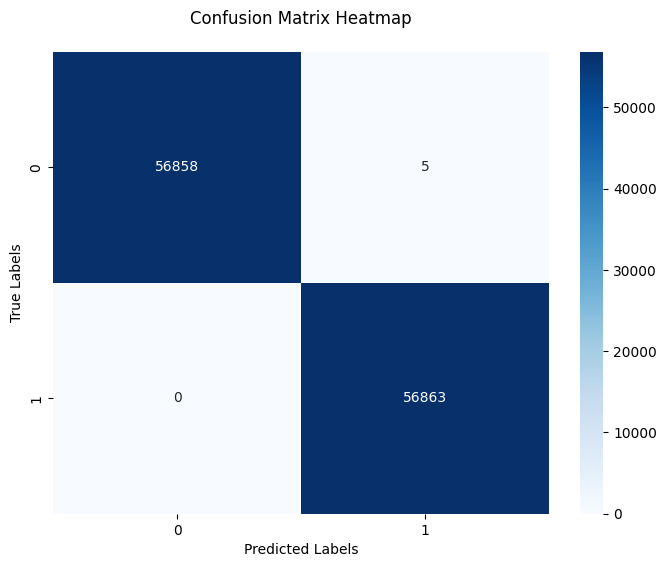

In [12]:
cm = confusion_matrix(y_test, y_test_pred)
fig = plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap', pad = 20)
plt.show()

# User Input Prediction

In [13]:
# Function to predict a new data row
def predict_new_data(input_data):
    # Convert the input data to a DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Scale 'Time' and 'Amount'
    input_df[['Time', 'Amount']] = scaler.transform(input_df[['Time', 'Amount']])

    # Make prediction
    prediction = clf.predict(input_df)
    
    # Return the result
    return prediction[0]


In [14]:
# Prompt user to enter new data for prediction
#152225
#543

input_str = input('Enter the new data for prediction (tab-separated values): ')
input_data = list(map(float, input_str.split('\t')))

# Ensure the input data length matches the number of features
if len(input_data) != X.shape[1]:
    print(f'Error: Expected {X.shape[1]} values, but got {len(input_data)} values.')
else:
    # Predict the class for the new data
    prediction = predict_new_data(input_data)
    print()
    if prediction==1:
        print(f"Predicted Class : {prediction}")
        print(f'The Transaction is Fraudulent')
    else:
        print(f"Predicted Class : {prediction}")
        print(f'The Transaction is Genuine')

Enter the new data for prediction (tab-separated values):  406	-2.312226542	1.951992011	-1.609850732	3.997905588	-0.522187865	-1.426545319	-2.537387306	1.391657248	-2.770089277	-2.772272145	3.202033207	-2.899907388	-0.595221881	-4.289253782	0.38972412	-1.14074718	-2.830055675	-0.016822468	0.416955705	0.126910559	0.517232371	-0.035049369	-0.465211076	0.320198199	0.044519167	0.177839798	0.261145003	-0.143275875	0



Predicted Class : 1
The Transaction is Fraudulent
